# Model
This notebook contains the code for the PyTorch model used in the workshop. The IRIS dataset is used for demonstration purposes.

In [1]:
# import libraries
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## Data Preparation

In [2]:
# fetch dataset
iris = fetch_ucirepo(id=53)

In [3]:
import pandas as pd
# data (as pandas dataframes)
# Initialize the MinMaxScaler
scaler = MinMaxScaler()
X = iris.data.features
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y = iris.data.targets

In [4]:
y = y.copy()
y["class"] = y["class"].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

/var/folders/jd/rmzvvh4s2jzg55h334m9_q040000gn/T/ipykernel_52277/274567636.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y["class"] = y["class"].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})


In [5]:
X.head()

,sepal length,sepal width,petal length,petal width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [6]:
# Convert data into tensors
data = torch.tensor(X.values).float()
labels = torch.tensor(y.values).long().squeeze()

## Model Definition

In [7]:
# model architecture
the_neural_network = nn.Sequential(
    nn.Linear(4,64),   # input layer
    nn.ReLU(),         # activation
    nn.Linear(64,64),  # hidden layer
    nn.ReLU(),         # activation
    nn.Linear(64,64),  # hidden layer
    nn.ReLU(),         # activation
    nn.Linear(64,3),   # output layer
      )

# loss function
lossfunc = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(the_neural_network.parameters(),lr=.01)

## Training
(training is a universal concept for all models. For NN, it's done through bla bla bla.)

In [8]:
epochs = 1000

# initialize losses
losses = torch.zeros(epochs)
Acc = []

# loop over epochs
for i in range(epochs):

  # forward pass
  pred = the_neural_network(data)

  # compute loss
  loss = lossfunc(pred,labels)
  losses[i] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # compute accuracy
  matches = torch.argmax(pred,axis=1) == labels # booleans (false/true)
  matchesNumeric = matches.float()              # convert to numbers (0/1)
  accuracyPct = 100*torch.mean(matchesNumeric)  # average and x100
  Acc.append( accuracyPct )              # add to list of accuracies

predictions = the_neural_network(data)

predlabels = torch.argmax(predictions,axis=1)
totalacc = 100*torch.mean((predlabels == labels).float())

Final accuracy: 88%


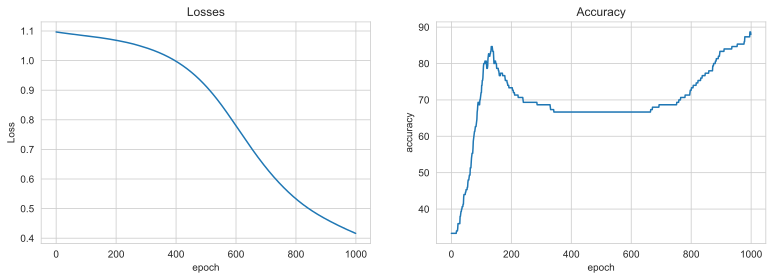

In [9]:
# report accuracy
print('Final accuracy: %g%%' %totalacc)

fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(Acc)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show()
# run training again to see whether this performance is consistent

## Validation

In [10]:
# We use an 80/20 split
# shuffle=False will take the first 80% for training and the last 20% for testing
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, shuffle=False
)


the_neural_network = nn.Sequential(
    nn.Linear(4,32),   # input layer
    nn.ReLU(),         # activation
    nn.Linear(32,32),  # hidden layer
    nn.ReLU(),         # activation
    nn.Linear(32,32),  # hidden layer
    nn.ReLU(),         # activation
    nn.Linear(32,3),   # output layer
)
lossfunc = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(the_neural_network.parameters(), lr=0.01)


epochs = 1000
trainLoss = torch.zeros(epochs)
testLoss = torch.zeros(epochs)
trainAcc = []
testAcc = []

for i in range(epochs):
    # --- Training Phase ---
    the_neural_network.train() # Switch to training mode
    yHat = the_neural_network(train_data)
    loss = lossfunc(yHat, train_labels)
    trainLoss[i] = loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # --- Evaluation Phase ---
    the_neural_network.eval() # Switch to evaluation mode
    with torch.no_grad(): # Don't calculate gradients for test data
        pred_test = the_neural_network(test_data)
        loss_test = lossfunc(pred_test, test_labels)
        testLoss[i] = loss_test.item()

        # Compute Accuracies
        train_matches = torch.argmax(yHat, axis=1) == train_labels
        train_acc = 100*torch.mean(train_matches.float())
        trainAcc.append(train_acc)

        test_matches = torch.argmax(pred_test, axis=1) == test_labels
        test_acc = 100*torch.mean(test_matches.float())
        testAcc.append(test_acc)

In [11]:
print('Final Test Accuracy with Shuffle=True: %g%%' %testAcc[-1])

Final Test Accuracy with Shuffle=True: 0%


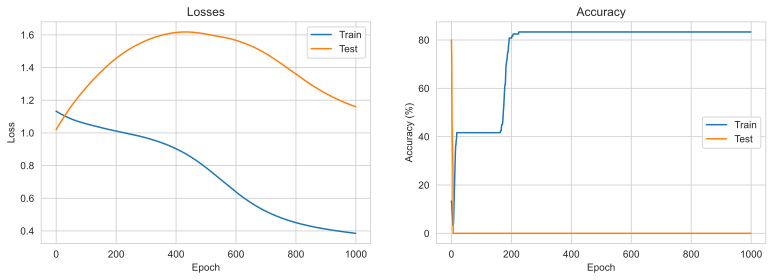

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(13, 4))

ax[0].plot(trainLoss, label='Train')
ax[0].plot(testLoss, label='Test')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_title('Losses')
ax[0].legend()

ax[1].plot(trainAcc, label='Train')
ax[1].plot(testAcc, label='Test')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_xlabel('Epoch')
ax[1].set_title('Accuracy')
ax[1].legend()

plt.show()

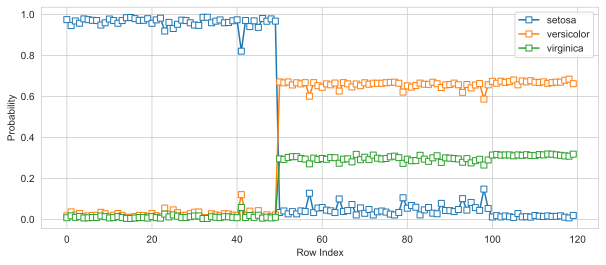

In [13]:
fig = plt.figure(figsize=(10,4))

sm = nn.Softmax(1)
plt.plot(sm(yHat.detach()),'s-',markerfacecolor='w')
plt.xlabel('Row Index')
plt.ylabel('Probability')
plt.legend(['setosa','versicolor','virginica'])
plt.show()

## Dealing with Bias

In [14]:
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, shuffle=True
)

the_neural_network = nn.Sequential(
    nn.Linear(4,32),
    nn.ReLU(),
    nn.Linear(32,32),
    nn.ReLU(),
    nn.Linear(32,32),
    nn.ReLU(),
    nn.Linear(32,3),
)
lossfunc = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(the_neural_network.parameters(), lr=0.01)

# 3. Training Loop
trainLoss = torch.zeros(epochs)
testLoss = torch.zeros(epochs)
trainAcc = []
testAcc = []

for i in range(epochs):
    # Train
    the_neural_network.train()


    yHat = the_neural_network(train_data)
    loss = lossfunc(yHat, train_labels)
    trainLoss[i] = loss.item()
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Test
    the_neural_network.eval()
    with torch.no_grad():
        pred_test = the_neural_network(test_data)
        loss_test = lossfunc(pred_test, test_labels)
        testLoss[i] = loss_test.item()
        
        train_acc = 100*torch.mean((torch.argmax(yHat, axis=1) == train_labels).float())
        test_acc = 100*torch.mean((torch.argmax(pred_test, axis=1) == test_labels).float())
        trainAcc.append(train_acc)
        testAcc.append(test_acc)

In [15]:
print('Final Test Accuracy with Shuffle=True: %g%%' %testAcc[-1])

Final Test Accuracy with Shuffle=True: 80%


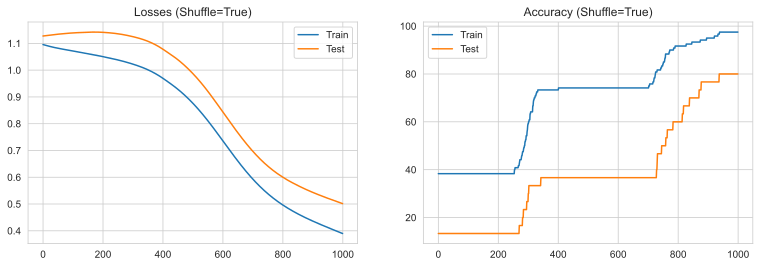

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(13, 4))

ax[0].plot(trainLoss, label='Train')
ax[0].plot(testLoss, label='Test')
ax[0].set_title('Losses (Shuffle=True)')
ax[0].legend()

ax[1].plot(trainAcc, label='Train')
ax[1].plot(testAcc, label='Test')
ax[1].set_title('Accuracy (Shuffle=True)')
ax[1].legend()

plt.show()

# Conclusion